In [2]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.fourier import PSD_continuous
from astroML.datasets import fetch_sdss_spectrum
from astroML.filters import min_component_filter

In [4]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [5]:
plate = 659
mjd = 52199
fiber = 381
data = fetch_sdss_spectrum(plate, mjd, fiber)

[========================================]  182.8kb / 182.8kb   
caching to /Users/jituo/astroML_data/SDSSspec/0659/spSpec-52199-0659-381.fit


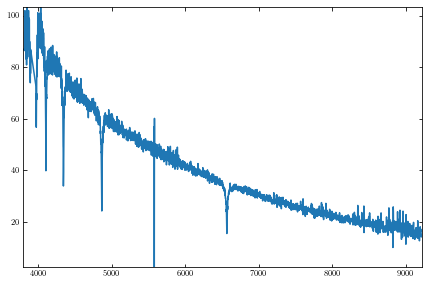

In [14]:
lam=data.wavelength()
spec=data.spectrum
plt.plot(lam,spec)

In [103]:
1/0.025

40.0

In [56]:
lam = data.wavelength()
spec = data.spectrum

# wavelengths are logorithmically spaced: we'll work in log(lam)
loglam = np.log10(lam)

flag = (lam > 4000) & (lam < 5000)
lam = lam[flag]
loglam = loglam[flag]
spec = spec[flag]

lam = lam[:-1]
loglam = loglam[:-1]
spec = spec[:-1]

#----------------------------------------------------------------------
# Mask-out significant features and compute filtered version
feature_mask = (((lam > 4080+10) & (lam < 4130-15)) |
                ((lam > 4315) & (lam < 4370)) |
                ((lam > 4830) & (lam < 4900)))

spec_filtered = min_component_filter(loglam, spec, feature_mask, fcut=100)

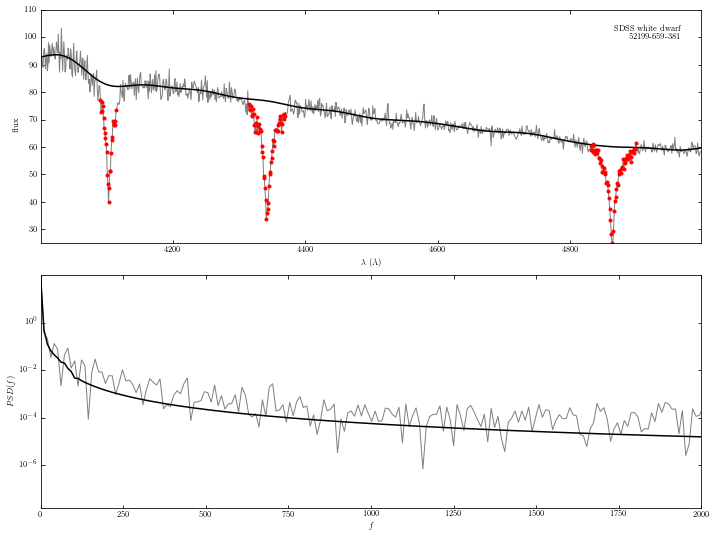

In [57]:
f, spec_filt_PSD = PSD_continuous(loglam, spec_filtered)
f, spec_PSD = PSD_continuous(loglam, spec)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5*2, 3.75*2))
fig.subplots_adjust(hspace=0.35)
ax = fig.add_subplot(211)
ax.plot(lam, spec, '-', c='gray', lw=1)
ax.plot(lam, spec_filtered, '-k')
ax.plot(lam[feature_mask],spec[feature_mask],'.',c='red')
ax.text(0.97, 0.93, "SDSS white dwarf\n %i-%i-%i" % (mjd, plate, fiber),
        ha='right', va='top', transform=ax.transAxes)

ax.set_ylim(25, 110)

ax.set_xlabel(r'$\lambda\ {\rm (\AA)}$')
ax.set_ylabel('flux')

# Bottom panel: plot noisy and smoothed PSD
ax = fig.add_subplot(212, yscale='log')
ax.plot(f, spec_PSD, '-', c='gray', lw=1)
ax.plot(f, spec_filt_PSD, '-k')

ax.set_xlabel(r'$f$')
ax.set_ylabel('$PSD(f)$')
ax.set_xlim(0, 2000)
plt.show()

In [34]:
lam = data.wavelength()
spec = data.spectrum

# wavelengths are logorithmically spaced: we'll work in log(lam)
loglam = np.log10(lam)

flag = (lam > 4000) & (lam < 5000)
lam = lam[flag]
loglam = loglam[flag]
spec = spec[flag]

In [35]:
lam.shape

(969,)

In [36]:
lam = lam[:-1]
loglam = loglam[:-1]
spec = spec[:-1]
lam.shape

(968,)

In [38]:
lam=np.array([1,2,3,4,5])

In [58]:
from scipy import stats

In [88]:
np.random.seed(5)

In [90]:
vals.shape

(10000,)

In [92]:
vals = np.random.normal(loc=0, scale=1, size=1000)

In [93]:
vals1 = np.random.normal(loc=0, scale=1, size=1000)

In [98]:
print,1.63/((1000*1000)/2000)**0.5

(<function print>, 0.07289581606649313)

In [94]:
x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')
stats.kstest(vals, vals1)

KstestResult(statistic=0.031, pvalue=0.7228251828701066)